### Build a Linear Regression Model

In [65]:
# Build the dataset 
filename = "Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter01/VehiclesItaly.txt"

X = []
y = []
with open(filename, 'r') as f:
    for line in f.readlines():
        xt, yt = [float(i) for i in line.split(',')]
        X.append(xt)
        y.append(yt)

In [66]:
# Train/test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training

import numpy as np

# Training data
X_train = np.array(X[:num_training]).reshape((num_training,1))
y_train = np.array(y[:num_training])

# Test data
X_test = np.array(X[num_training:]).reshape((num_test,1))
y_test = np.array(y[num_training:])

In [73]:
# Create linear regression object
from sklearn import linear_model

linear_regressor = linear_model.LinearRegression()

# Train the model using the training sets
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
# Predict the output
y_train_pred = linear_regressor.predict(X_train)

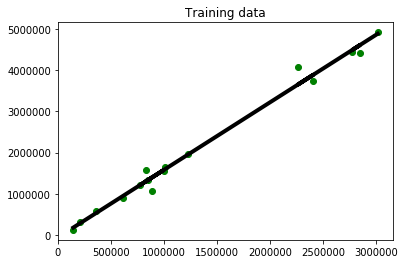

In [82]:
# Plot 
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_train_pred, color='black', linewidth=4)
plt.title('Training data')
plt.show()

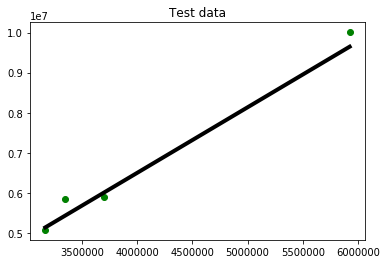

In [87]:
y_test_pred = linear_regressor.predict(X_test)
plt.figure()
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.title('Test data')
plt.show()

In [88]:
# Measure performance
import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


In [92]:
# Model persistence
import pickle

output_model_file = "3_model_linear_regr.pkl"

with open(output_model_file, 'wb') as f:
    pickle.dump(linear_regressor, f)

with open(output_model_file, 'rb') as f:
    model_linregr = pickle.load(f)

In [94]:
y_test_pred_new = model_linregr.predict(X_test)
print("New mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_new), 2)) 

New mean absolute error = 241907.27


In [95]:
ridge_regressor = linear_model.Ridge(alpha=0.01, fit_intercept=True, max_iter=10000)

ridge_regressor.fit(X_train, y_train)
y_test_pred_ridge = ridge_regressor.predict(X_test)
print( "Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred_ridge), 2))
print( "Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred_ridge), 2))
print( "Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred_ridge), 2))
print( "R2 score =", round(sm.r2_score(y_test, y_test_pred_ridge), 2))

Mean absolute error = 241907.27
Mean squared error = 81974851872.13
Median absolute error = 240861.94
Explain variance score = 0.98
R2 score = 0.98


### Estimating Housing Prices Problem

In [1]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [3]:
housing_data = datasets.load_boston()

X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [11]:
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [12]:
ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
ab_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=400,
         random_state=7)

In [13]:
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt)
print("#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82


In [14]:
y_pred_ab = ab_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ab)
evs = explained_variance_score(y_test, y_pred_ab)
print("#### AdaBoost performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### AdaBoost performance ####
Mean squared error = 7.66
Explained variance score = 0.91


### Computing the Relative Importance of Features

In [15]:
DTFImp= dt_regressor.feature_importances_
DTFImp= 100.0 * (DTFImp / max(DTFImp))
index_sorted = np.flipud(np.argsort(DTFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

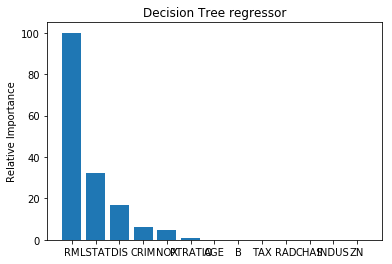

In [16]:
%matplotlib inline

plt.figure()
plt.bar(pos, DTFImp[index_sorted], align='center')
plt.xticks(pos, housing_data.feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("Decision Tree regressor")
plt.show()

In [18]:
ABFImp= ab_regressor.feature_importances_
ABFImp= 100.0 * (ABFImp / max(ABFImp))
index_sorted = np.flipud(np.argsort(ABFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

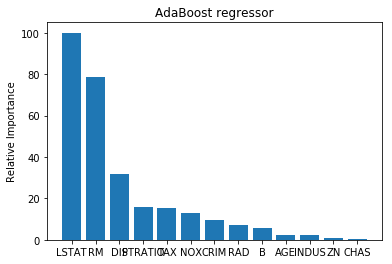

In [19]:
plt.figure()
plt.bar(pos, ABFImp[index_sorted], align='center')
plt.xticks(pos, housing_data.feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("AdaBoost regressor")
plt.show()

### Estimating Bicycle Demand Distribution Problem

In [20]:
import csv
import numpy as np

In [32]:
filename="Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter01/bike_day.csv"
file_reader = csv.reader(open(filename, 'r'), delimiter=',')
X, y = [], []
for row in file_reader:
    X.append(row[2:13])
    y.append(row[-1])

In [33]:
# Extract feature names
feature_names = np.array(X[0])

# Remove the first row because they are feature names
X=np.array(X[1:]).astype(np.float32)
y=np.array(y[1:]).astype(np.float32)

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=7) 

num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [35]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
y_pred = rf_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Random Forest regressor performance ####
Mean squared error = 361133.0
Explained variance score = 0.89


In [37]:
RFFImp= rf_regressor.feature_importances_ 
RFFImp= 100.0 * (RFFImp / max(RFFImp))
index_sorted = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

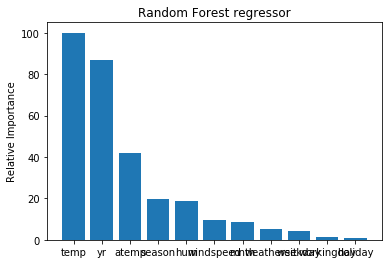

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.bar(pos, RFFImp[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("Random Forest regressor")
plt.show()

### Method 2

In [40]:
import csv
import numpy as np

In [42]:
filename="Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter01/bike_day.csv"
file_reader = csv.reader(open(filename, 'r'), delimiter=',')
X, y = [], []
for row in file_reader:
    X.append(row[2:15])
    y.append(row[-1])

In [43]:
# Extract feature names
feature_names = np.array(X[0])

# Remove the first row because they are feature names
X=np.array(X[1:]).astype(np.float32)
y=np.array(y[1:]).astype(np.float32)

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=7) 

num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
y_pred = rf_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Random Forest regressor performance ####
Mean squared error = 22127.29
Explained variance score = 0.99


In [46]:
RFFImp= rf_regressor.feature_importances_ 
RFFImp= 100.0 * (RFFImp / max(RFFImp))
index_sorted = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

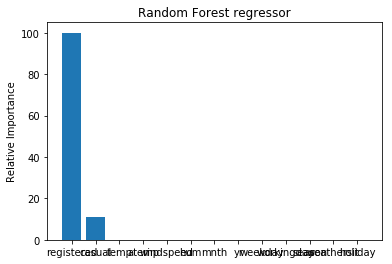

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.bar(pos, RFFImp[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("Random Forest regressor")
plt.show()

### Method 3

In [49]:
import csv
import numpy as np

In [50]:
filename="Python-Machine-Learning-Cookbook-Second-Edition-master/Chapter01/bike_hour.csv"
file_reader = csv.reader(open(filename, 'r'), delimiter=',')
X, y = [], []
for row in file_reader:
    X.append(row[2:14])
    y.append(row[-1])

In [51]:
# Extract feature names
feature_names = np.array(X[0])

# Remove the first row because they are feature names
X=np.array(X[1:]).astype(np.float32)
y=np.array(y[1:]).astype(np.float32)

from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=7) 

num_training = int(0.9 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [53]:
y_pred = rf_regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, explained_variance_score
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print( "#### Random Forest regressor performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

#### Random Forest regressor performance ####
Mean squared error = 2623.21
Explained variance score = 0.92


In [54]:
RFFImp= rf_regressor.feature_importances_ 
RFFImp= 100.0 * (RFFImp / max(RFFImp))
index_sorted = np.flipud(np.argsort(RFFImp))
pos = np.arange(index_sorted.shape[0]) + 0.5

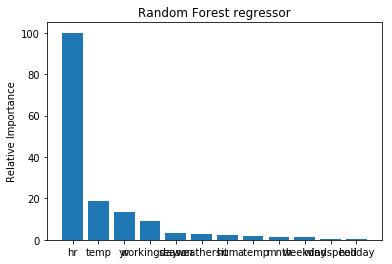

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.bar(pos, RFFImp[index_sorted], align='center')
plt.xticks(pos, feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title("Random Forest regressor")
plt.show()